In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy import stats

In [10]:
!head -n 5 ../data/babyboom.dat.txt 

    0005       1    3837       5
    0104       1    3334      64
    0118       2    3554      78
    0155       2    3838     115
    0257       2    3625     177


In [15]:
data = pd.read_csv('../data/babyboom.dat.txt', header=None, sep='\s*',
                   engine='python', names=['TOB', 'sex', 'weight', 'minutes'])

In [16]:
data.head()

,TOB,sex,weight,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [43]:
df = data[['sex', 'weight', 'minutes']]

In [45]:
df.sex = df.sex.replace([1,2], ['female', 'male'])

In [46]:
df.head()

,sex,weight,minutes
0,female,3837,5
1,female,3334,64
2,male,3554,78
3,male,3838,115
4,male,3625,177


In [47]:
df.boxplot(by='sex')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f86d090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10f5da490>], dtype=object)

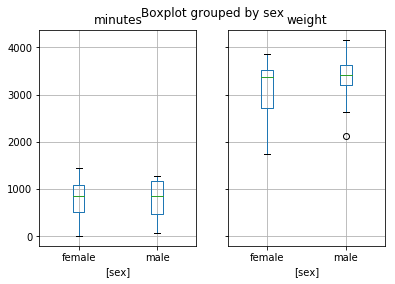

In [48]:
plt.show()

In [51]:
df.groupby('sex').describe()

minutes                                                                \
         count        mean         std   min     25%    50%      75%     max   
sex                                                                            
female    18.0  773.000000  446.050775   5.0  507.75  846.5  1094.25  1435.0   
male      26.0  799.615385  402.687281  78.0  464.25  849.5  1177.50  1283.0   

       weight                                                            \
        count         mean         std     min     25%     50%      75%   
sex                                                                       
female   18.0  3132.444444  631.582534  1745.0  2711.0  3381.0  3517.25   
male     26.0  3375.307692  428.046051  2121.0  3198.0  3404.0  3628.75   

                
           max  
sex             
female  3866.0  
male    4162.0

In [52]:
?df.unstack()

In [54]:
(k2, pval) = stats.normaltest(df[df['sex'] == 'male'].weight)

In [55]:
k2

7.5550562637207186

In [56]:
pval

0.022879175891202971

pval < 0.05, male's weight is not a normal distribution

In [58]:
df.groupby('sex').get_group('male').hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc4f7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fcb3d50>]], dtype=object)

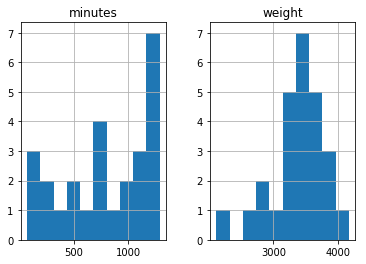

In [59]:
plt.show()